# TSNE with new model

## Model Setup (from model.ipynb)

### Load Packages

In [1]:
# Main modules 
import torch
from torch import Generator
from torch.utils.data import DataLoader, random_split
import torchvision
from torchvision.datasets import ImageFolder
from torchvision.transforms.functional import to_pil_image
import pandas as pd
import matplotlib.pyplot as plt

# Custom modules
from frogfunctions import Model 
from frogfunctions import setup_seed, train_loop, test_loop, train_model, plot_probabilities

In [2]:
# Dataframe output format
pd.set_option('display.float_format', lambda x: '%.6f' % x)

# Set device 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

### Set random seed for reproduction

In [3]:
SEED = 42
setup_seed(SEED)

### Import data

In [4]:
data_dir = "../data/"

In [5]:
# Download and load the training data
dataset_all = ImageFolder(data_dir, transform=torchvision.transforms.ToTensor())

# Print number in full data set
size_all = len(dataset_all)
print(f'Before splitting the full dataset into train and test: len(dataset_all) = {size_all}')

# Split into Test, Validation, and Training
size_test = int(size_all * 0.10)
size_val = int(size_all * 0.10)
size_train = size_all - size_test - size_val
dataset_test, dataset_val, dataset_train = random_split(dataset_all, [size_test, size_val, size_train], 
                                                        generator=Generator().manual_seed(SEED))

print(f'After splitting the full dataset into test, validation, and training: \n \
      len(dataset_test) = {len(dataset_test)} \n \
      len(dataset_val) = {len(dataset_val)} \n \
      len(dataset_train) = {len(dataset_train)}')

Before splitting the full dataset into train and test: len(dataset_all) = 700
After splitting the full dataset into test, validation, and training: 
       len(dataset_test) = 70 
       len(dataset_val) = 70 
       len(dataset_train) = 560


### Prepare data

In [6]:
# Define batch size
batch_size = 16

In [7]:
# Load data into DataLoader
train_dataloader = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(dataset_val, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(dataset_test, batch_size=batch_size, shuffle=True)

dataloaders = {'train':train_dataloader, 'val':val_dataloader}
dataset_sizes = {'train':len(dataset_train), 'val':len(dataset_val)}

### Define parameters for model

In [8]:
# Define number of classes
num_classes = 7

In [9]:
# Create model 
model = Model(num_classes=num_classes).to(device)

In [10]:
# Define hyperparameters
learning_rate = 0.002
weight_decay = 0.005
momentum=0.09

# Define loss function
loss_fn = torch.nn.CrossEntropyLoss()

# Define optimizer 
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay, momentum=momentum)

### Train model

Epoch 1
-------------------------------
loss: 1.949642  [   16/  560]
Training Error: Accuracy: 23.2%


/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


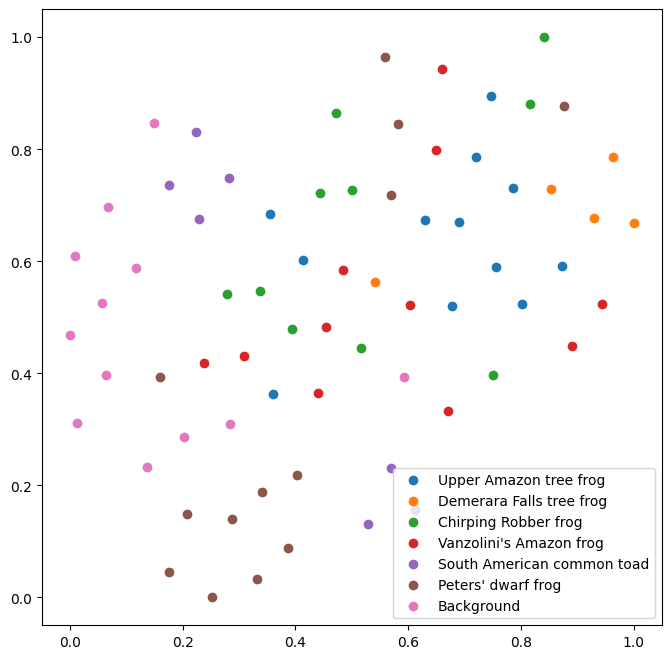

Validation Error: Accuracy: 8.6%, Avg loss: 1.935358 

Epoch 2
-------------------------------
loss: 1.918215  [   16/  560]
Training Error: Accuracy: 39.8%


/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


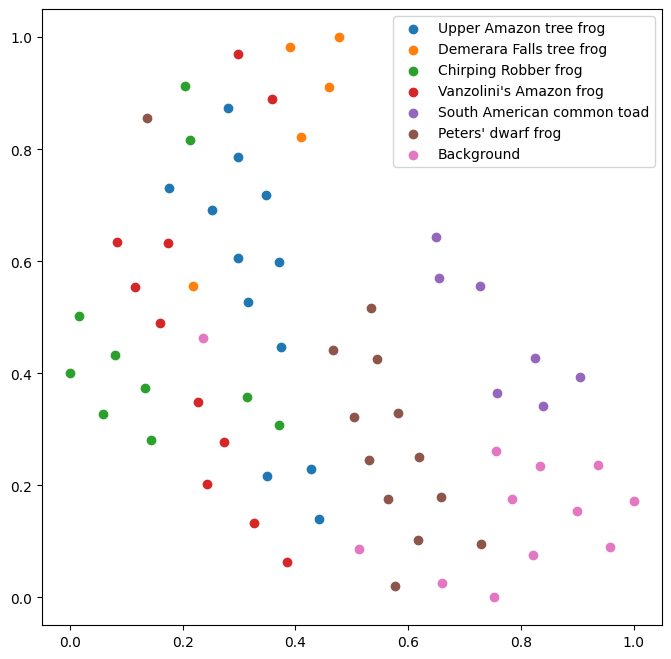

Validation Error: Accuracy: 52.9%, Avg loss: 1.830725 

Epoch 3
-------------------------------
loss: 1.875491  [   16/  560]
Training Error: Accuracy: 50.4%


/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


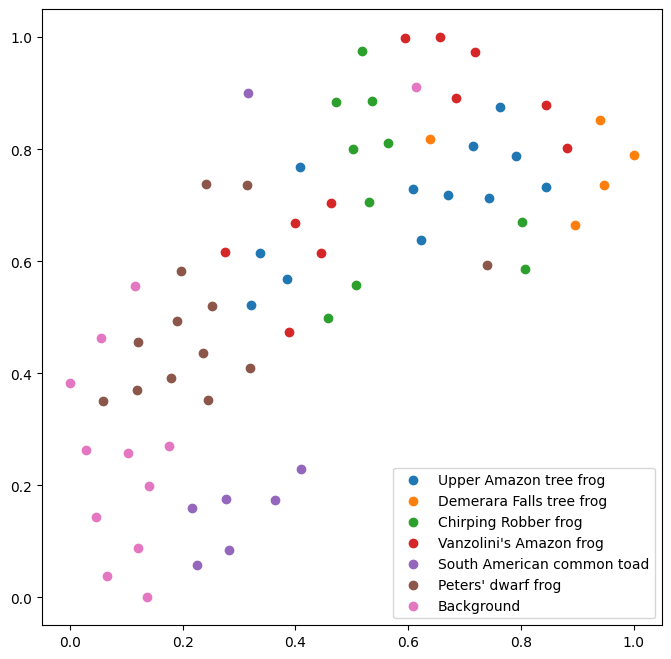

Validation Error: Accuracy: 68.6%, Avg loss: 1.719960 

Epoch 4
-------------------------------
loss: 1.749612  [   16/  560]
Training Error: Accuracy: 67.9%


/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


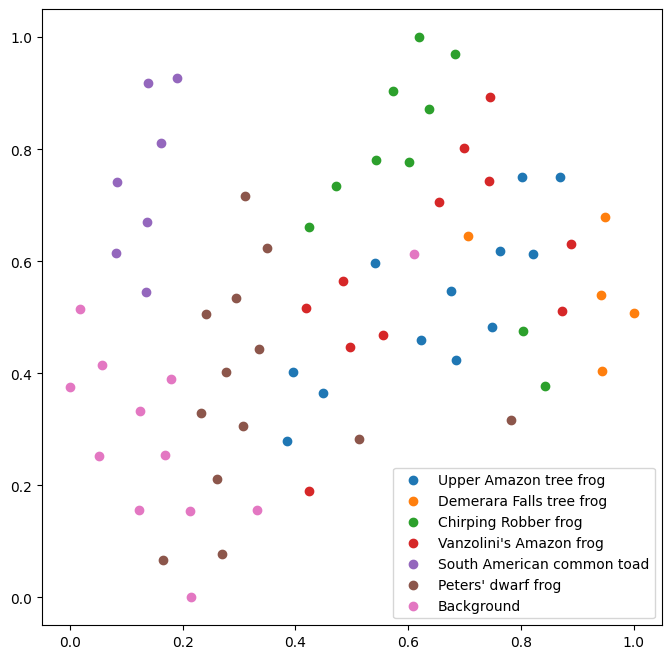

Validation Error: Accuracy: 65.7%, Avg loss: 1.617507 

Epoch 5
-------------------------------
loss: 1.635360  [   16/  560]
Training Error: Accuracy: 66.2%


/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


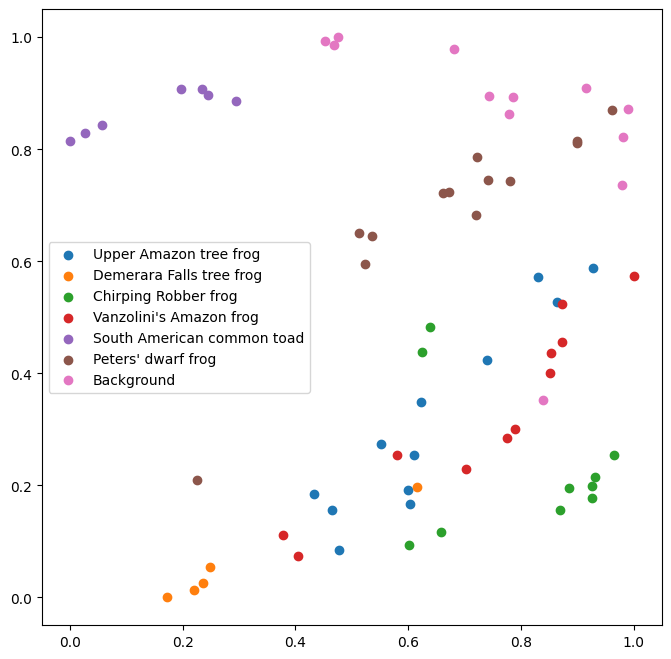

Validation Error: Accuracy: 77.1%, Avg loss: 1.395559 

Epoch 6
-------------------------------
loss: 1.426786  [   16/  560]
Training Error: Accuracy: 74.8%


/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


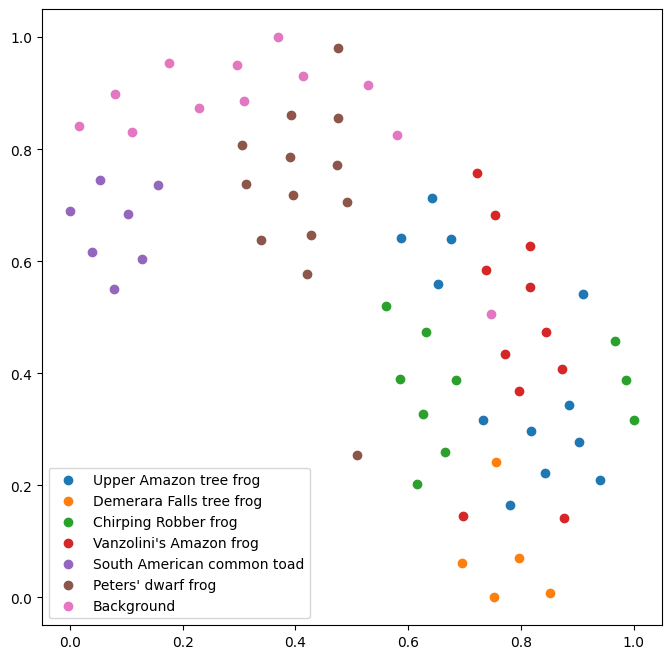

Validation Error: Accuracy: 74.3%, Avg loss: 1.219422 

Epoch 7
-------------------------------
loss: 1.180408  [   16/  560]
Training Error: Accuracy: 82.3%


/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


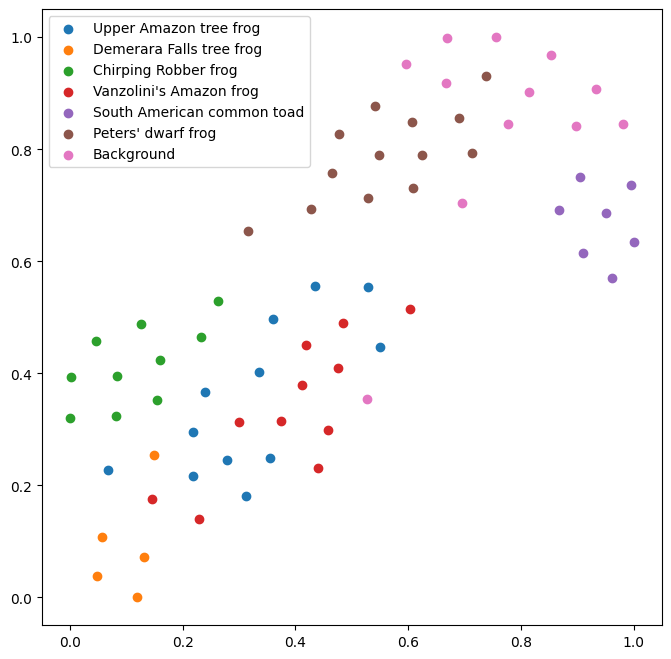

Validation Error: Accuracy: 90.0%, Avg loss: 1.005667 

Epoch 8
-------------------------------
loss: 1.075590  [   16/  560]
Training Error: Accuracy: 85.9%


/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


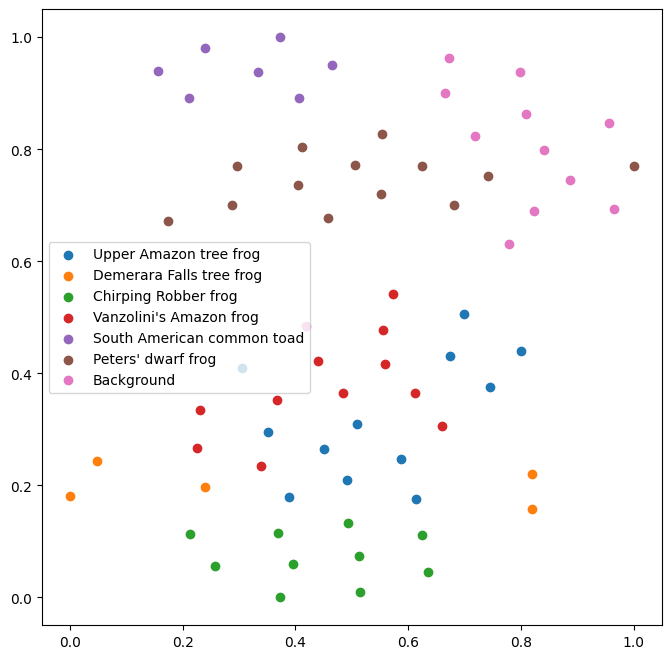

Validation Error: Accuracy: 88.6%, Avg loss: 0.733284 

Epoch 9
-------------------------------
loss: 0.729981  [   16/  560]
Training Error: Accuracy: 89.5%


/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


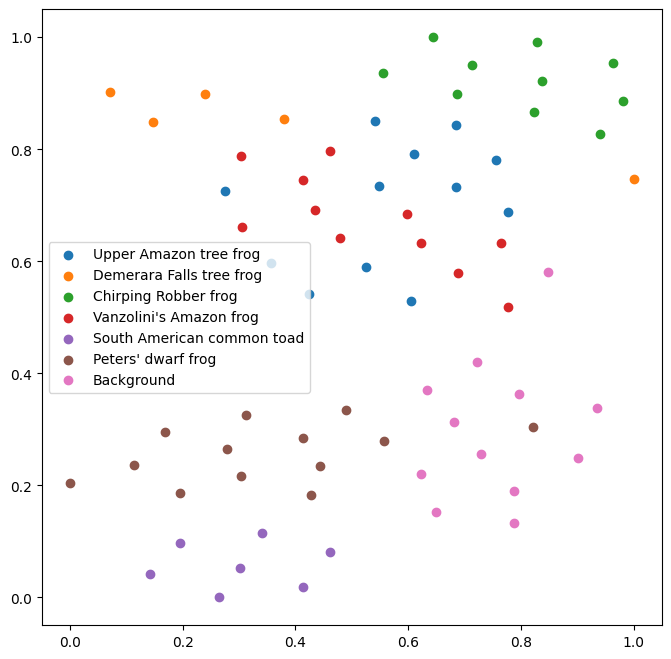

Validation Error: Accuracy: 90.0%, Avg loss: 0.584082 

Epoch 10
-------------------------------
loss: 0.618001  [   16/  560]
Training Error: Accuracy: 91.8%


/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


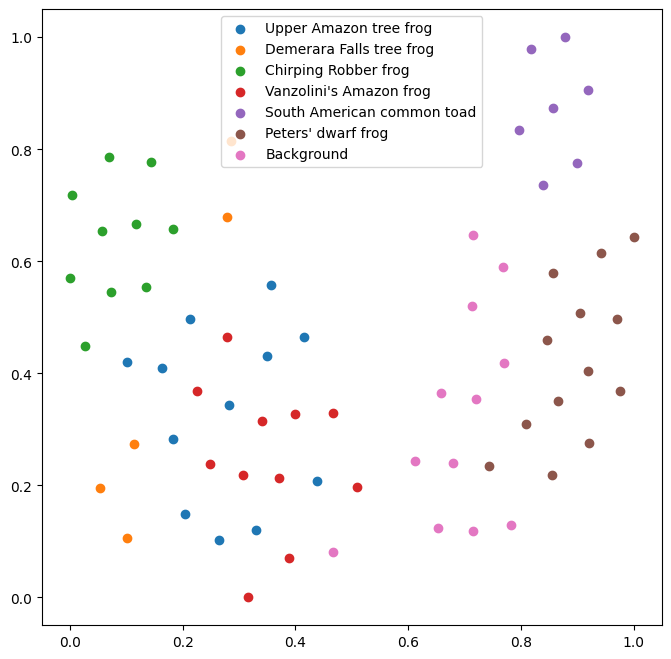

Validation Error: Accuracy: 94.3%, Avg loss: 0.392335 

Epoch 11
-------------------------------
loss: 0.452045  [   16/  560]
Training Error: Accuracy: 92.9%


/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


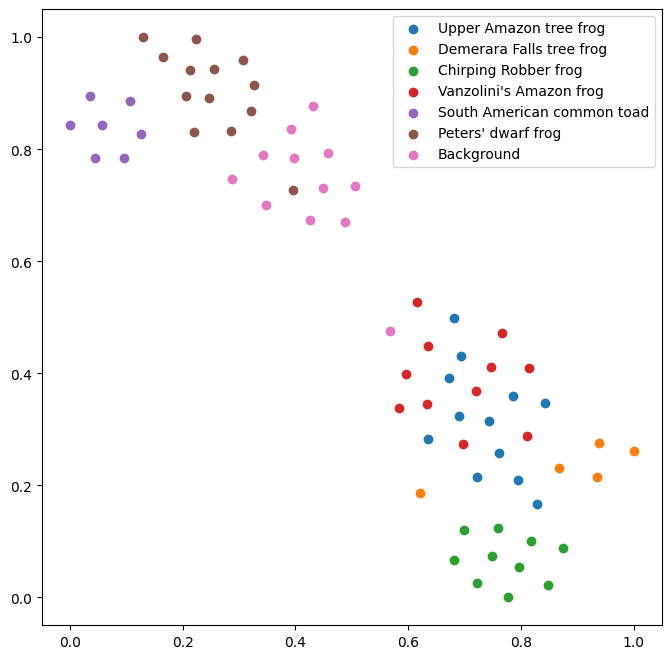

Validation Error: Accuracy: 94.3%, Avg loss: 0.338949 

Epoch 12
-------------------------------
loss: 0.235509  [   16/  560]
Training Error: Accuracy: 93.4%


/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


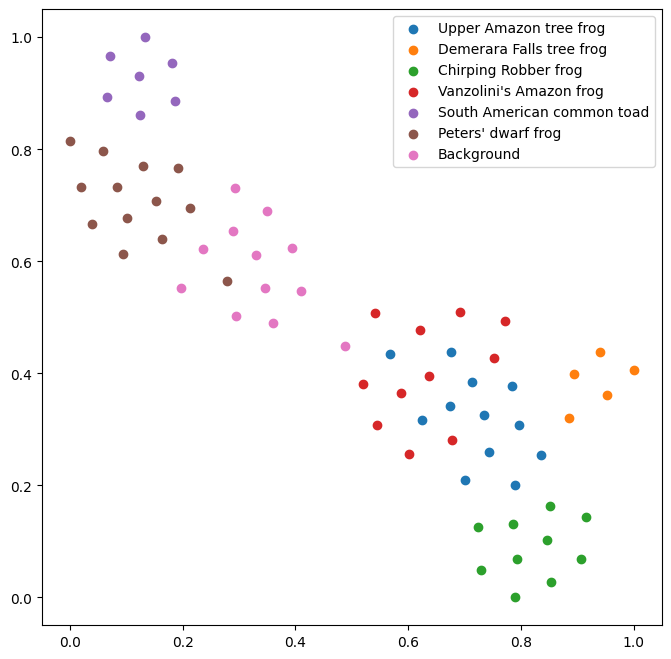

Validation Error: Accuracy: 95.7%, Avg loss: 0.305470 

Epoch 13
-------------------------------
loss: 0.214578  [   16/  560]
Training Error: Accuracy: 94.5%


/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


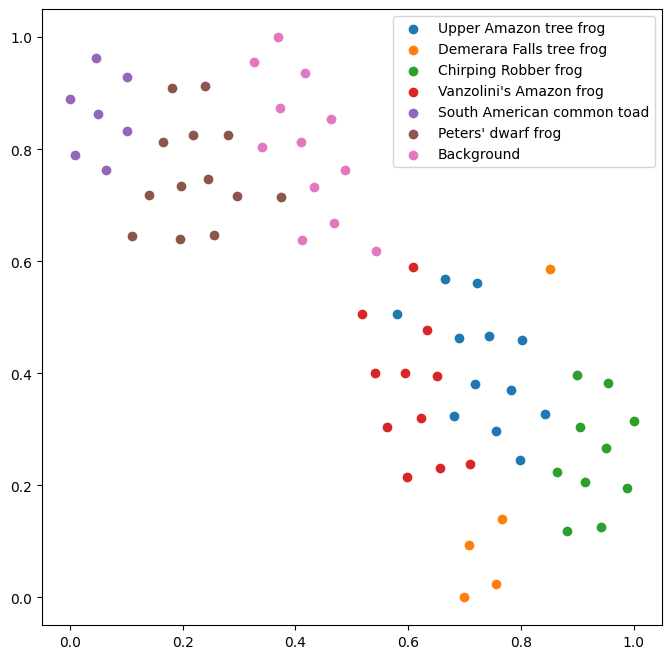

Validation Error: Accuracy: 95.7%, Avg loss: 0.267955 

Epoch 14
-------------------------------
loss: 0.238296  [   16/  560]
Training Error: Accuracy: 95.5%


/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


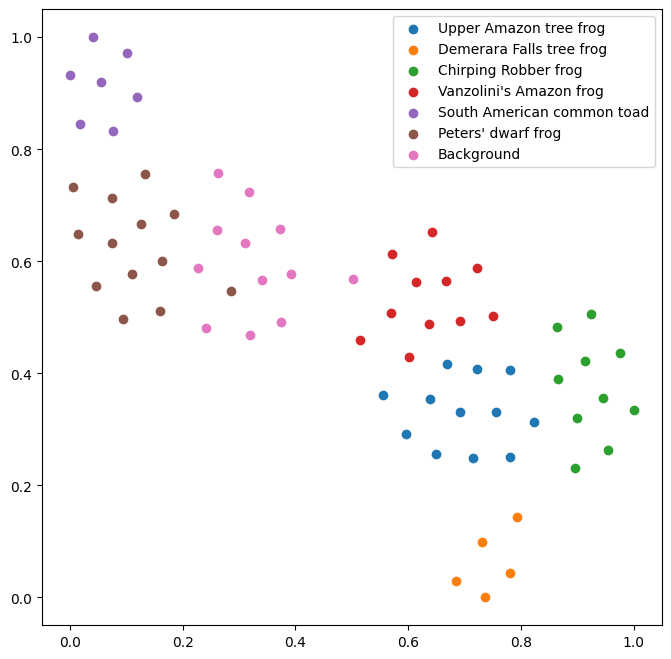

Validation Error: Accuracy: 97.1%, Avg loss: 0.196604 

Epoch 15
-------------------------------
loss: 0.217784  [   16/  560]
Training Error: Accuracy: 96.8%


/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


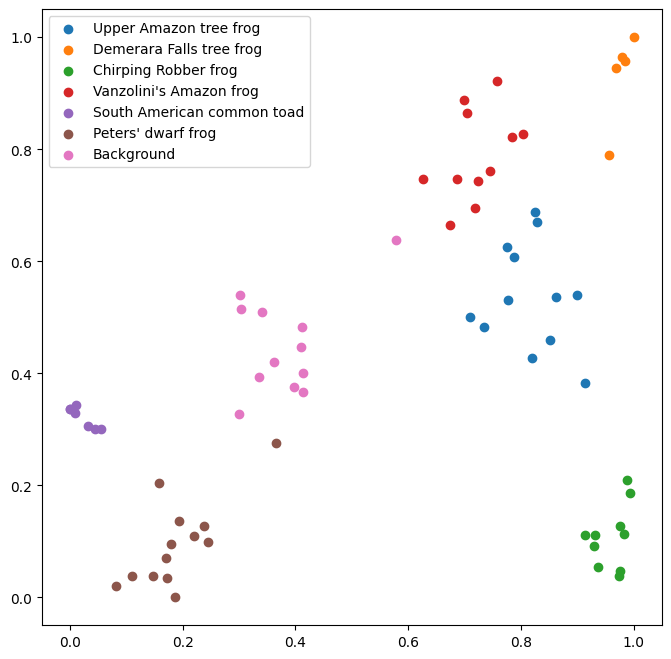

Validation Error: Accuracy: 95.7%, Avg loss: 0.141859 

Epoch 16
-------------------------------
loss: 0.212582  [   16/  560]
Training Error: Accuracy: 96.4%


/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


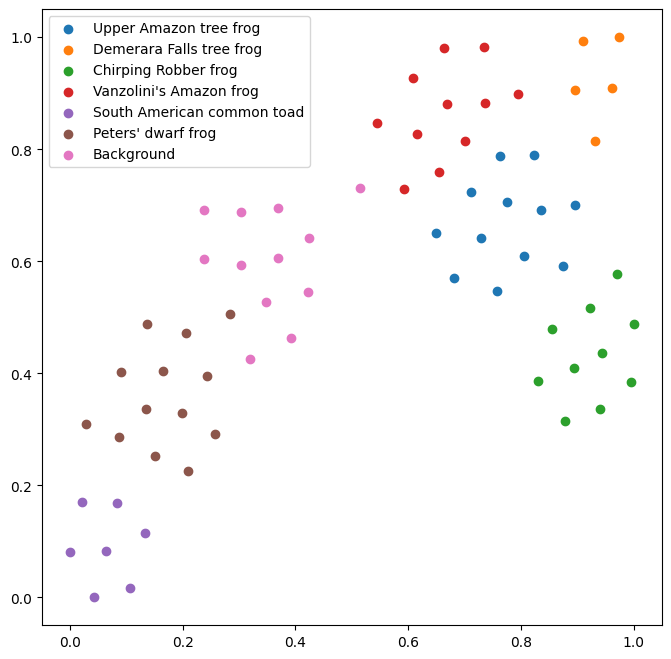

Validation Error: Accuracy: 97.1%, Avg loss: 0.136896 

Epoch 17
-------------------------------
loss: 0.183086  [   16/  560]
Training Error: Accuracy: 96.6%


/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


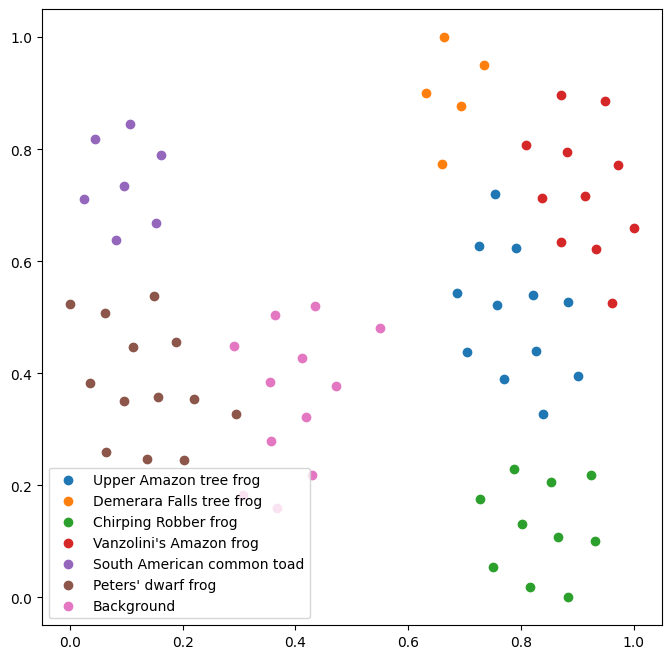

Validation Error: Accuracy: 98.6%, Avg loss: 0.109859 

Epoch 18
-------------------------------
loss: 0.234627  [   16/  560]
Training Error: Accuracy: 97.9%


/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


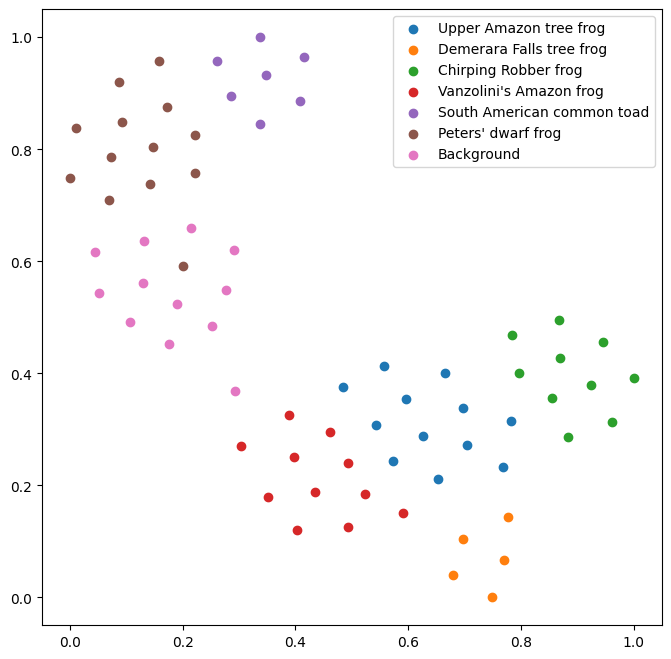

Validation Error: Accuracy: 97.1%, Avg loss: 0.105534 

Epoch 19
-------------------------------
loss: 0.213376  [   16/  560]
Training Error: Accuracy: 97.0%


/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


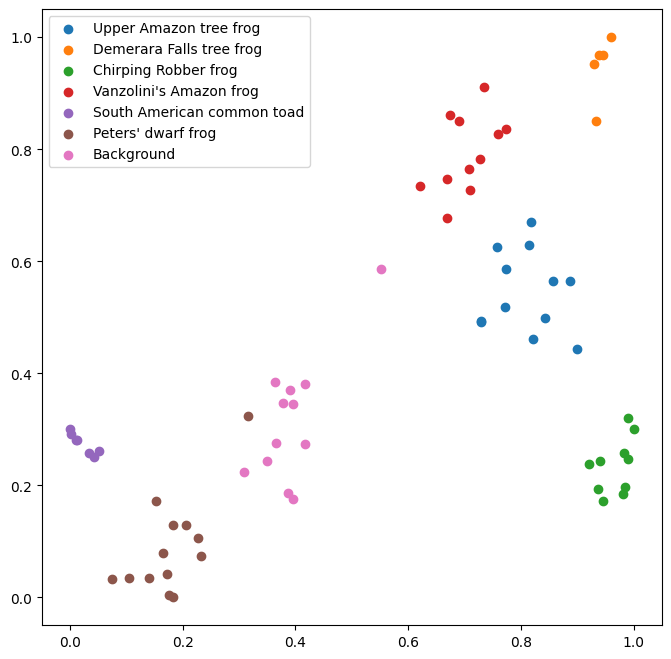

Validation Error: Accuracy: 97.1%, Avg loss: 0.087789 

Epoch 20
-------------------------------
loss: 0.197224  [   16/  560]
Training Error: Accuracy: 97.9%


/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


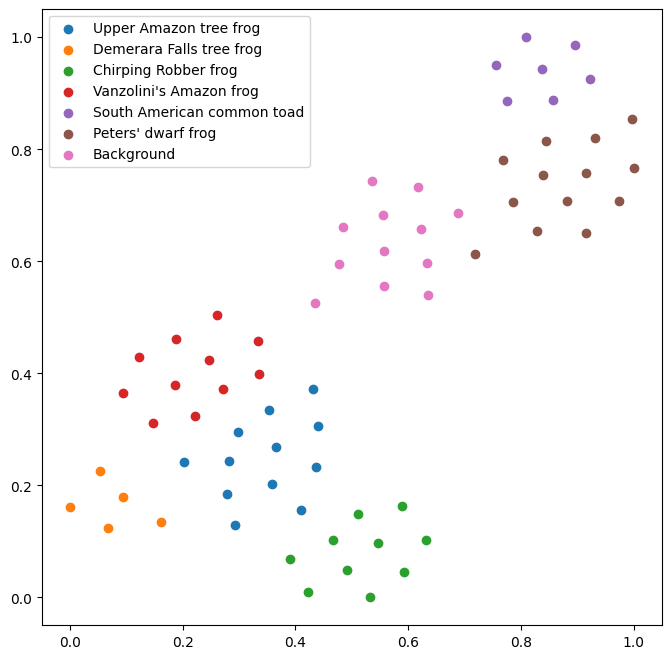

Validation Error: Accuracy: 97.1%, Avg loss: 0.076237 

Processing time: 621.08s.


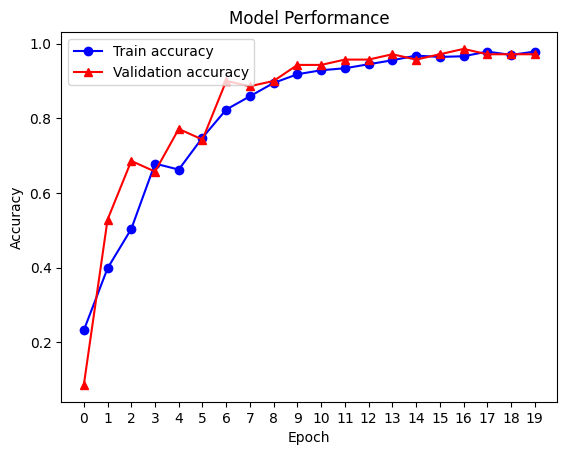

In [11]:
# Set number of epochs 
epochs = 20

# Train
train_model(train_dataloader, val_dataloader, model, loss_fn, optimizer, epochs)